## Main notebook for EDA Assignment
#### Make sure to go through the steps in the `data/README.md` file
#### To ensure you have your project setup correctly before using this file

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
print("Setup Complete")

Setup Complete


In [51]:
# Combine season 2000 - 2018 data exclude 2019-20 and 2020-21
# Load the data
season_2000_01 = pd.read_csv('data/Datasets/2000-01.csv')
season_2001_02 = pd.read_csv('data/Datasets/2001-02.csv')
season_2002_03 = pd.read_csv('data/Datasets/2002-03.csv')
season_2003_04 = pd.read_csv('data/Datasets/2003-04.csv')
season_2004_05 = pd.read_csv('data/Datasets/2004-05.csv')
season_2005_06 = pd.read_csv('data/Datasets/2005-06.csv')
season_2006_07 = pd.read_csv('data/Datasets/2006-07.csv')
season_2007_08 = pd.read_csv('data/Datasets/2007-08.csv')
season_2008_09 = pd.read_csv('data/Datasets/2008-09.csv')
season_2009_10 = pd.read_csv('data/Datasets/2009-10.csv')
season_2010_11 = pd.read_csv('data/Datasets/2010-11.csv')
season_2011_12 = pd.read_csv('data/Datasets/2011-12.csv')
season_2012_13 = pd.read_csv('data/Datasets/2012-13.csv')
season_2013_14 = pd.read_csv('data/Datasets/2013-14.csv')
season_2014_15 = pd.read_csv('data/Datasets/2014-15.csv')
season_2015_16 = pd.read_csv('data/Datasets/2015-16.csv')
season_2016_17 = pd.read_csv('data/Datasets/2016-17.csv')
season_2017_18 = pd.read_csv('data/Datasets/2017-18.csv')
# NOTE: We are excluding 2018-19 and 2019-20 season data as it is incomplete
season_2020_21 = pd.read_csv('data/2020-2021.csv')
season_2021_22 = pd.read_csv('data/2021-2022.csv')

In [52]:
# Required columns
columns = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
           'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']

# Combine all the dataframes into one with the required columns
seasons = [season_2000_01, season_2001_02, season_2002_03, season_2003_04, season_2004_05, season_2005_06,
           season_2006_07, season_2007_08, season_2008_09, season_2009_10, season_2010_11, season_2011_12,
           season_2012_13, season_2013_14, season_2014_15, season_2015_16, season_2016_17, season_2017_18]

# Combine all the dataframes into one with the required columns
results_data = pd.concat([df[columns] for df in seasons], ignore_index=True)

# Change the Date column to datetime format
results_data['Date'] = pd.to_datetime(results_data['Date'], format='mixed', dayfirst=True)

# Save the combined dataframe to a csv file
results_data.to_csv('data/all_match_results.csv', index=False)

# Display the first 5 rows of the combined dataframe
results_data.head()


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-08-19,Charlton,Man City,4,0,H,2,0,H,Rob Harris,...,14,4,6,6,13,12,1,2,0,0
1,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,Graham Barber,...,10,5,7,7,19,14,1,2,0,0
2,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,Barry Knight,...,3,9,8,4,15,21,5,3,1,0
3,2000-08-19,Derby,Southampton,2,2,D,1,2,A,Andy D'Urso,...,4,6,5,8,11,13,1,1,0,0
4,2000-08-19,Leeds,Everton,2,0,H,2,0,H,Dermot Gallagher,...,8,6,6,4,21,20,1,3,0,0


In [53]:
# Load the combined match results data
results_data = pd.read_csv('data/all_match_results.csv')

# 1. Top Scoring Teams
# Please include the number of games played by each team
home_goals = results_data.groupby('HomeTeam')['FTHG'].sum()
away_goals = results_data.groupby('AwayTeam')['FTAG'].sum()
total_goals = home_goals + away_goals

# Calculate the number of games played by each team
home_games = results_data['HomeTeam'].value_counts()
away_games = results_data['AwayTeam'].value_counts()
total_games = home_games.add(away_games, fill_value=0)

# Combine goals and games played into a DataFrame
top_scoring_teams = pd.DataFrame({'Goals': total_goals, 'Games': total_games})

# Sort by goals scored
top_scoring_teams = top_scoring_teams.sort_values(by='Goals', ascending=True).head(30)

print("Top Scoring Teams:\n", top_scoring_teams)

Top Scoring Teams:
                   Goals  Games
Huddersfield         28     38
Bradford             30     38
Cardiff              32     38
Sheffield United     32     38
Brighton             34     38
Coventry             36     38
Middlesboro          48     38
Blackpool            55     38
Derby                90    114
Ipswich              98     76
QPR                 115    114
Reading             136    114
Bournemouth         145    114
Burnley             145    152
Watford             153    152
Wolves              156    152
Hull                181    190
Norwich             202    190
Leeds               215    152
Crystal Palace      255    228
Birmingham          273    266
Portsmouth          292    266
Charlton            301    266
Swansea             306    266
Wigan               316    304
Leicester           335    266
Middlesbrough       366    342
Stoke               398    380
West Brom           475    456
Bolton              495    418


In [54]:
# 2. Home vs Away Performance
home_performance = results_data.groupby('HomeTeam')['FTHG'].sum()
away_performance = results_data.groupby('AwayTeam')['FTAG'].sum()
performance_comparison = pd.DataFrame({'Home': home_performance, 'Away': away_performance}).fillna(0)
performance_comparison['Total'] = performance_comparison['Home'] + performance_comparison['Away']
performance_comparison = performance_comparison.sort_values(by='Total', ascending=False).head(10)
print("Home vs Away Performance:\n", performance_comparison)

Home vs Away Performance:
              Home  Away  Total
Arsenal       755   561   1316
Man United    731   570   1301
Chelsea       735   537   1272
Liverpool     661   519   1180
Man City      630   469   1099
Tottenham     615   443   1058
Everton       551   363    914
Newcastle     456   317    773
Aston Villa   377   341    718
West Ham      393   292    685


In [55]:
# 2a. What teams score the most goals at home?
home_performance = results_data.groupby('HomeTeam')['FTHG'].sum()
home_performance = home_performance.sort_values(ascending=False).head(10)
print("Teams that score the most goals at home:\n", home_performance)

# 2b. What teams score the most goals away?
away_performance = results_data.groupby('AwayTeam')['FTAG'].sum()
away_performance = away_performance.sort_values(ascending=False).head(10)
print("Teams that score the most goals away:\n", away_performance)


Teams that score the most goals at home:
 HomeTeam
Arsenal        755
Chelsea        735
Man United     731
Liverpool      661
Man City       630
Tottenham      615
Everton        551
Newcastle      456
West Ham       393
Aston Villa    377
Name: FTHG, dtype: int64
Teams that score the most goals away:
 AwayTeam
Man United     570
Arsenal        561
Chelsea        537
Liverpool      519
Man City       469
Tottenham      443
Everton        363
Aston Villa    341
Newcastle      317
West Ham       292
Name: FTAG, dtype: int64


In [56]:
# 3. Most Frequent Match Outcomes
match_outcomes = results_data['FTR'].value_counts()
print("Most Frequent Match Outcomes:\n", match_outcomes)

Most Frequent Match Outcomes:
 FTR
H    3176
A    1913
D    1751
Name: count, dtype: int64


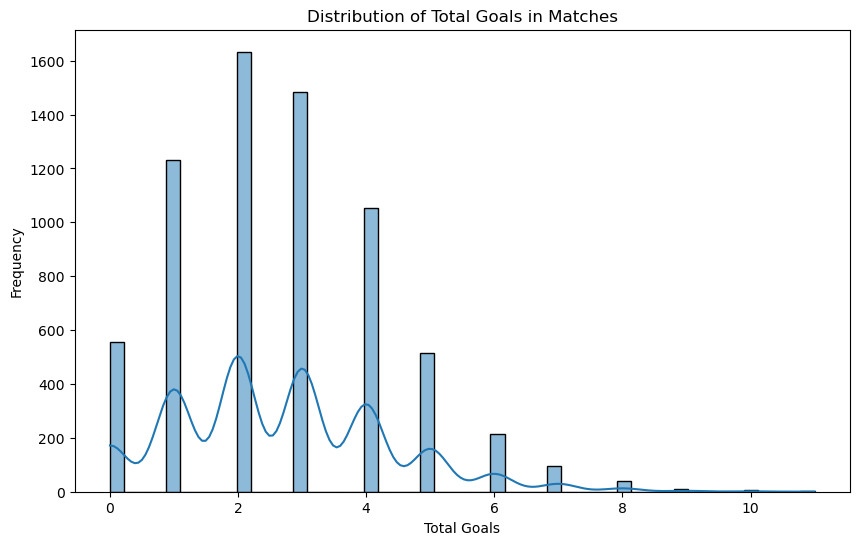

In [57]:
# 4. Goals Distribution
plt.figure(figsize=(10, 6))
sns.histplot(results_data['FTHG'] + results_data['FTAG'], bins=50, kde=True)
plt.title('Distribution of Total Goals in Matches')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()

In [58]:
# 5. Referee Influence
referee_goals = results_data.groupby('Referee')[['FTHG', 'FTAG']].mean().sum(axis=1).sort_values(ascending=False).head(10)
print("Referees with Highest Average Goals per Match:\n", referee_goals)

Referees with Highest Average Goals per Match:
 Referee
Ian Harris      6.0
St Bennett      5.0
ﾠS Dunn         5.0
D Gallagh       5.0
P. Jones        5.0
R Martin        4.0
ﾠA Wiley        4.0
ﾠH Webb         4.0
A. G. Wiley     4.0
P.A. Durkin     4.0
dtype: float64


/var/folders/lw/6p1r6xmj4qzcts8dvyg4vmqr0000gn/T/ipykernel_5455/2485407760.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Goals', data=season_goals, palette='viridis')


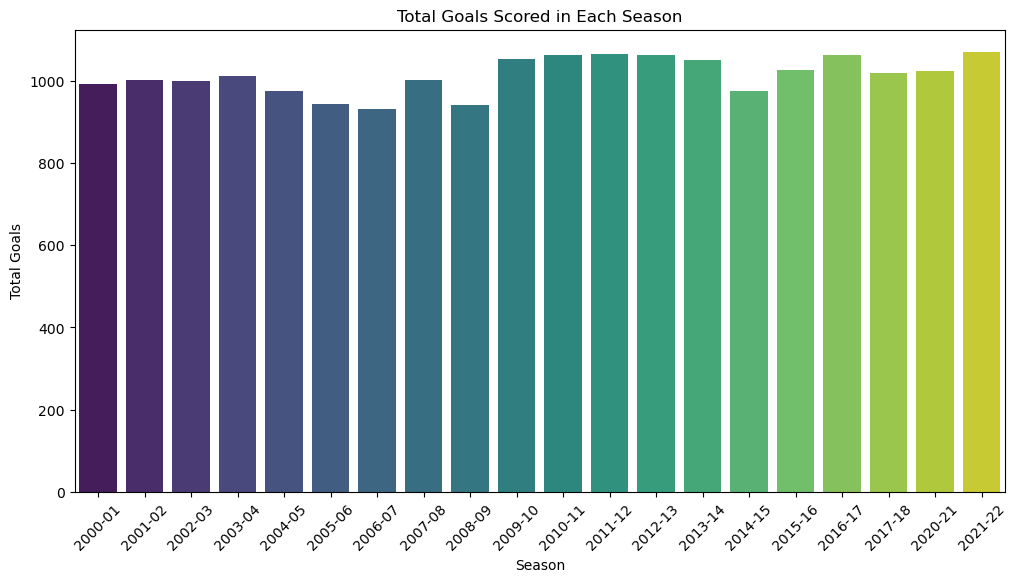

In [60]:
# 6. Goals scored in each season 
# Calculate the total goals scored in each season
season_2000_01_goals = season_2000_01['FTHG'].sum() + season_2000_01['FTAG'].sum()
season_2001_02_goals = season_2001_02['FTHG'].sum() + season_2001_02['FTAG'].sum()
season_2002_03_goals = season_2002_03['FTHG'].sum() + season_2002_03['FTAG'].sum()
season_2003_04_goals = season_2003_04['FTHG'].sum() + season_2003_04['FTAG'].sum()
season_2004_05_goals = season_2004_05['FTHG'].sum() + season_2004_05['FTAG'].sum()
season_2005_06_goals = season_2005_06['FTHG'].sum() + season_2005_06['FTAG'].sum()
season_2006_07_goals = season_2006_07['FTHG'].sum() + season_2006_07['FTAG'].sum()
season_2007_08_goals = season_2007_08['FTHG'].sum() + season_2007_08['FTAG'].sum()
season_2008_09_goals = season_2008_09['FTHG'].sum() + season_2008_09['FTAG'].sum()
season_2009_10_goals = season_2009_10['FTHG'].sum() + season_2009_10['FTAG'].sum()
season_2010_11_goals = season_2010_11['FTHG'].sum() + season_2010_11['FTAG'].sum()
season_2011_12_goals = season_2011_12['FTHG'].sum() + season_2011_12['FTAG'].sum()
season_2012_13_goals = season_2012_13['FTHG'].sum() + season_2012_13['FTAG'].sum()
season_2013_14_goals = season_2013_14['FTHG'].sum() + season_2013_14['FTAG'].sum()
season_2014_15_goals = season_2014_15['FTHG'].sum() + season_2014_15['FTAG'].sum()
season_2015_16_goals = season_2015_16['FTHG'].sum() + season_2015_16['FTAG'].sum()
season_2016_17_goals = season_2016_17['FTHG'].sum() + season_2016_17['FTAG'].sum()
season_2017_18_goals = season_2017_18['FTHG'].sum() + season_2017_18['FTAG'].sum()
season_2020_21_goals = season_2020_21['FTHG'].sum() + season_2020_21['FTAG'].sum()
season_2021_22_goals = season_2021_22['FTHG'].sum() + season_2021_22['FTAG'].sum()

# Create a DataFrame with the total goals scored in each season
season_goals = pd.DataFrame({'Season': ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07',
                                        '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
                                        '2014-15', '2015-16', '2016-17', '2017-18', '2020-21', '2021-22'],
                             'Goals': [season_2000_01_goals, season_2001_02_goals, season_2002_03_goals,
                                       season_2003_04_goals, season_2004_05_goals, season_2005_06_goals,
                                       season_2006_07_goals, season_2007_08_goals, season_2008_09_goals,
                                       season_2009_10_goals, season_2010_11_goals, season_2011_12_goals,
                                       season_2012_13_goals, season_2013_14_goals, season_2014_15_goals,
                                       season_2015_16_goals, season_2016_17_goals, season_2017_18_goals,
                                       season_2020_21_goals, season_2021_22_goals]})

# Plot the total goals scored in each season
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Goals', data=season_goals, palette='viridis')
plt.title('Total Goals Scored in Each Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.show()


In [62]:

# 7. Head-to-Head Analysis
team1 = 'Man United'
team2 = 'Man City'
head_to_head = results_data[((results_data['HomeTeam'] == team1) & (results_data['AwayTeam'] == team2)) |
                            ((results_data['HomeTeam'] == team2) & (results_data['AwayTeam'] == team1))]

# Sum up the total goals scored by each team in the head-to-head matches
# Sum up the overall record of each team in the head-to-head matches
team1_goals = head_to_head[head_to_head['HomeTeam'] == team1]['FTHG'].sum() + head_to_head[head_to_head['AwayTeam'] == team1]['FTAG'].sum()
team2_goals = head_to_head[head_to_head['HomeTeam'] == team2]['FTHG'].sum() + head_to_head[head_to_head['AwayTeam'] == team2]['FTAG'].sum()
team1_wins = head_to_head[(head_to_head['HomeTeam'] == team1) & (head_to_head['FTR'] == 'H')].shape[0] + head_to_head[(head_to_head['AwayTeam'] == team1) & (head_to_head['FTR'] == 'A')].shape[0]
team2_wins = head_to_head[(head_to_head['HomeTeam'] == team2) & (head_to_head['FTR'] == 'H')].shape[0] + head_to_head[(head_to_head['AwayTeam'] == team2) & (head_to_head['FTR'] == 'A')].shape[0]
draws = head_to_head[head_to_head['FTR'] == 'D'].shape[0]

# Display the head-to-head results
print(f"Head-to-Head Results between {team1} and {team2}:\n")
print(f"Total Goals Scored by {team1}: {team1_goals}")
print(f"Total Goals Scored by {team2}: {team2_goals}")
print(f"Total Wins for {team1}: {team1_wins}")
print(f"Total Wins for {team2}: {team2_wins}")
print(f"Total Draws: {draws}")

print(f"Head-to-Head Results between {team1} and {team2}:\n", head_to_head[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']])


Head-to-Head Results between Man United and Man City:

Total Goals Scored by Man United: 43
Total Goals Scored by Man City: 49
Total Wins for Man United: 14
Total Wins for Man City: 13
Total Draws: 7
Head-to-Head Results between Man United and Man City:
             Date    HomeTeam    AwayTeam  FTHG  FTAG FTR
133   2000-11-18    Man City  Man United     0     1   A
340   2001-04-21  Man United    Man City     1     1   D
884   2002-11-09    Man City  Man United     3     1   H
1026  2003-02-09  Man United    Man City     1     1   D
1293  2003-12-13  Man United    Man City     3     1   H
1415  2004-03-14    Man City  Man United     4     1   H
1636  2004-11-07  Man United    Man City     0     0   D
1785  2005-02-13    Man City  Man United     0     2   A
1939  2005-09-10  Man United    Man City     1     1   D
2110  2006-01-14    Man City  Man United     3     1   H
2440  2006-12-09  Man United    Man City     3     1   H
2641  2007-05-05    Man City  Man United     0     1   A
2686

Correlation between yellow cards and match outcomes:
           HY        AY       FTR
HY   1.000000  0.192797 -0.133260
AY   0.192797  1.000000  0.027502
FTR -0.133260  0.027502  1.000000

Explanation:
1. The correlation between the number of yellow cards received by the home team and the match outcome is: -0.13325981247006527
2. The correlation between the number of yellow cards received by the away team and the match outcome is: 0.027502016305538907

Correlation between red cards and match outcomes:
           HR        AR       FTR
HR   1.000000  0.074132 -0.135550
AR   0.074132  1.000000  0.094301
FTR -0.135550  0.094301  1.000000

Explanation:
1. The correlation between the number of red cards received by the home team and the match outcome is: -0.1355495559183792
2. The correlation between the number of red cards received by the away team and the match outcome is: 0.09430112836280774


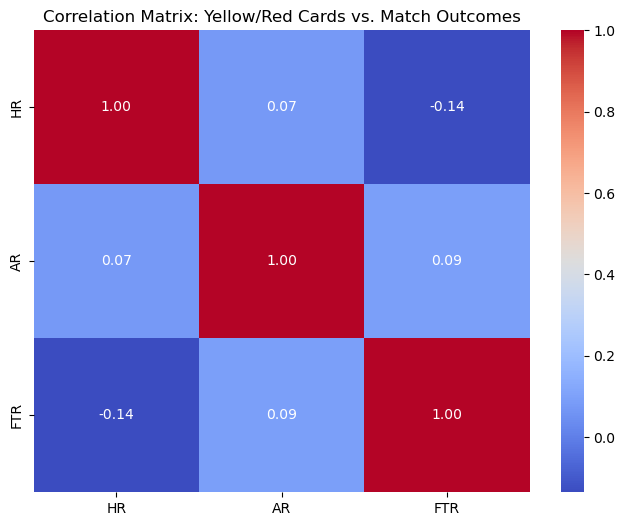

In [11]:
# TODO: Do disciplinary actions (yellow and red cards) have an impact on the outcome of a match?

# 8. Yellow Cards Influence
# Try to find a correlation between the number of yellow cards and the outcome of the match
# If home team has more yellow cards, does it affect the outcome of the match?
# If the away team has more yellow cards, does it affect the outcome of the match?
# Calculate the correlation between yellow cards and match outcomes
yellow_cards_correlation = results_data[['HY', 'AY', 'FTR']].copy()

# Convert FTR to numerical values for correlation calculation
# H -> 1 (Home win), D -> 0 (Draw), A -> -1 (Away win)
yellow_cards_correlation['FTR'] = yellow_cards_correlation['FTR'].map({'H': 1, 'D': 0, 'A': -1})

# Calculate the correlation matrix
correlation_matrix = yellow_cards_correlation.corr()

# Display the correlation matrix
print("Correlation between yellow cards and match outcomes:")
print(correlation_matrix)

# Explain the correlation matrix
print("\nExplanation:")
print("1. The correlation between the number of yellow cards received by the home team and the match outcome is:", correlation_matrix.loc['HY', 'FTR'])
print("2. The correlation between the number of yellow cards received by the away team and the match outcome is:", correlation_matrix.loc['AY', 'FTR'])

# 9. Red Cards Influence
# Try to find a correlation between the number of red cards and the outcome of the match
# If home team has more red cards, does it affect the outcome of the match?
# If the away team has more red cards, does it affect the outcome of the match?
# Calculate the correlation between red cards and match outcomes
red_cards_correlation = results_data[['HR', 'AR', 'FTR']].copy()

# Convert FTR to numerical values for correlation calculation
# H -> 1 (Home win), D -> 0 (Draw), A -> -1 (Away win)
red_cards_correlation['FTR'] = red_cards_correlation['FTR'].map({'H': 1, 'D': 0, 'A': -1})

# Calculate the correlation matrix
correlation_matrix = red_cards_correlation.corr()

# Display the correlation matrix
print("\nCorrelation between red cards and match outcomes:")
print(correlation_matrix)

# Explain the correlation matrix
print("\nExplanation:")
print("1. The correlation between the number of red cards received by the home team and the match outcome is:", correlation_matrix.loc['HR', 'FTR'])
print("2. The correlation between the number of red cards received by the away team and the match outcome is:", correlation_matrix.loc['AR', 'FTR'])


# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Yellow/Red Cards vs. Match Outcomes')
plt.show()





1. **Home Advantage Analysis**:
    - Do teams generally perform better at home compared to away? Calculate the win percentage for home and away games.

2. **Goal Scoring Patterns**:
    - Which team has the highest average goals per match? 
    - Are there any significant differences in the number of goals scored in the first half versus the second half?

3. **Referee Influence**:
    - Which referees tend to officiate matches with the highest average number of goals?
    - Is there a correlation between the number of yellow/red cards given by a referee and the match outcome?

4. **Seasonal Trends**:
    - How do the total number of goals scored in a season change over the years?
    - Are there any noticeable trends in the number of yellow and red cards issued over the seasons?

5. **Team Performance Over Time**:
    - How has the performance of top teams (e.g., Man United, Liverpool) changed over the years? 
    - Which team has shown the most improvement or decline over the seasons?

6. **Impact of Early Goals**:
    - How often does the team that scores the first goal go on to win the match?
    - What is the average time of the first goal in matches that end in a win versus those that end in a draw or loss?

7. **Head-to-Head Analysis**:
    - What are the win/loss/draw statistics for major rivalries (e.g., Man United vs. Liverpool)?
    - How do these statistics change when the match is played at home versus away?

8. **Disciplinary Actions**:
    - Do teams with more yellow/red cards tend to lose more matches?
    - Is there a significant difference in the number of cards received by home teams versus away teams?

9. **Goal Distribution**:
    - What is the distribution of total goals scored in a match? Are high-scoring matches (e.g., more than 4 goals) common?
    - Which teams are involved in the highest number of high-scoring matches?

10. **Match Outcome Prediction**:
     - Can we build a predictive model to determine the outcome of a match based on historical data? What features (e.g., home/away, referee, team form) are most predictive?



In [12]:
# 10. Home Advantage Analysis
# Does playing at home provide an advantage to the home team?
# Calculate the win rate for home and away teams
home_win_rate = (results_data[results_data['FTR'] == 'H'].shape[0] / results_data.shape[0]) * 100
away_win_rate = (results_data[results_data['FTR'] == 'A'].shape[0] / results_data.shape[0]) * 100

# Calculate the draw rate
draw_rate = (results_data[results_data['FTR'] == 'D'].shape[0] / results_data.shape[0]) * 100

# Display the win rates
print(f"Home Win Rate: {home_win_rate:.2f}%")
print(f"Away Win Rate: {away_win_rate:.2f}%")
print(f"Draw Rate: {draw_rate:.2f}%")

# # Plot the win rates
# plt.figure(figsize=(8, 6))
# win_rates = [home_win_rate, away_win_rate, draw_rate]
# labels = ['Home Win', 'Away Win', 'Draw']
# plt.pie(win_rates, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
# plt.axis('equal')
# plt.title('Match Outcomes: Home vs. Away')
# plt.show()

# 11. Average Goals per Match
# Which teams have the highest average goals per match
# Are there any significant differences in the average goals scored in the first half vs. second half?

# Calculate the number of games each team has played
home_games = results_data['HomeTeam'].value_counts()
away_games = results_data['AwayTeam'].value_counts()
total_games = home_games + away_games

# Calculate the average goals per match for each team
average_goals = results_data.groupby('HomeTeam')[['FTHG', 'FTAG']].mean().sum(axis=1)
average_goals = average_goals.sort_values(ascending=False).head(10)
print("Teams with Highest Average Goals per Match:\n", average_goals)

# Calculate the average goals scored in the first half and second half
average_goals_half = results_data.groupby('HomeTeam')[['HTHG', 'HTAG', 'FTHG', 'FTAG']].mean()
average_goals_half = average_goals_half[['HTHG', 'HTAG', 'FTHG', 'FTAG']].mean()
print("\nAverage Goals per Match (First Half vs. Second Half):\n", average_goals_half)

# Display the number of games each team has played
print("\nNumber of Games Played by Each Team:\n", total_games)

# # Plot the average goals per match
# plt.figure(figsize=(10, 6))
# average_goals.plot(kind='bar', color='skyblue')
# plt.title('Teams with Highest Average Goals per Match')
# plt.xlabel('Team')
# plt.ylabel('Average Goals per Match')
# plt.show()

# # Plot the average goals scored in the first half and second half
# plt.figure(figsize=(10, 6))
# average_goals_half.plot(kind='bar', color='lightcoral')
# plt.title('Average Goals per Match (First Half vs. Second Half)')
# plt.xlabel('Match Half')
# plt.ylabel('Average Goals per Match')
# plt.show()



Home Win Rate: 46.43%
Away Win Rate: 27.97%
Draw Rate: 25.60%
Teams with Highest Average Goals per Match:
 HomeTeam
Blackpool      3.526316
Bournemouth    3.105263
Arsenal        3.052632
Middlesboro    3.000000
Chelsea        2.938596
Man City       2.900929
Cardiff        2.894737
Leeds          2.842105
Tottenham      2.830409
Wolves         2.828947
dtype: float64

Average Goals per Match (First Half vs. Second Half):
 HTHG    0.601251
HTAG    0.546338
FTHG    1.372514
FTAG    1.252757
dtype: float64

Number of Games Played by Each Team:
 Arsenal             684
Aston Villa         608
Birmingham          266
Blackburn           418
Blackpool            38
Bolton              418
Bournemouth         114
Bradford             38
Brighton             38
Burnley             152
Cardiff              38
Charlton            266
Chelsea             684
Coventry             38
Crystal Palace      228
Derby               114
Everton             684
Fulham              494
Huddersfield       